In [126]:
from sentence_transformers import SentenceTransformer, util
import pandas as pd
import numpy as np

import umap
import umap.plot
from sklearn.datasets import load_digits

In [24]:
model = SentenceTransformer('xlm-roberta-base')

#Our sentences we like to encode
sentences = ['ข้าวมันไก่']

#Sentences are encoded by calling model.encode()
sentence_embeddings = model.encode(sentences)

#Print the embeddings
for sentence, embedding in zip(sentences, sentence_embeddings):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")

Downloading:   0%|          | 0.00/445 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.24k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/615 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

No sentence-transformers model found with name /home/patcharapon/.cache/torch/sentence_transformers/xlm-roberta-base. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at /home/patcharapon/.cache/torch/sentence_transformers/xlm-roberta-base were not used when initializing XLMRobertaModel: ['lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing XLMRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Sentence: ข้าวมันไก่
Embedding: [ 3.72552983e-02  4.52393778e-02  1.42889665e-02  1.23480819e-02
  2.16765553e-02  1.33018894e-02  1.56986676e-02 -5.12253381e-02
  8.78487751e-02 -4.15287912e-02 -3.07196844e-02  7.86060765e-02
  4.31106597e-01 -6.09509787e-03  1.12848543e-02  6.87399879e-03
 -2.75319498e-02 -3.85196544e-02  4.31545042e-02 -1.25229983e-02
  7.79288039e-02  1.52898235e-02  1.01366408e-01  7.26548210e-02
  1.07049346e-02 -1.48345893e-02 -4.18454036e-03  5.00321873e-02
 -1.74427275e-02  1.26704276e-02  6.04066961e-02 -1.60885174e-02
 -4.54862006e-02  2.39849761e-02  3.31520028e-02 -8.89253244e-02
 -8.87605920e-02 -1.58015490e-02  6.57973960e-02  5.25106974e-02
  9.98249277e-02 -1.64067764e-02  6.28293753e-02 -2.72873137e-02
  4.31199670e-02 -1.76320653e-02  3.96072678e-02 -3.56195793e-02
  2.56872416e-04 -6.16901964e-02  3.38075049e-02  1.11863352e-02
  3.78714837e-02 -6.10598065e-02 -8.31465274e-02  3.31399962e-02
  7.23417774e-02  1.23913372e-02  4.17794585e-02  1.163193

In [ ]:
emb1 = model.encode("This is a red cat with a hat.")
emb2 = model.encode("red cat with red shirt")

cos_sim = util.cos_sim(emb1, emb2)
print("Cosine-Similarity:", cos_sim)

In [35]:
emb1 = model.encode("ประกอบกิจการออกแบบผลิตจำหน่ายอุปกรณ์ จิวเวอร์รี่ เทียนเม็ดหล่องานจิวเวอร์รี")
emb2 = model.encode("การทำเครื่องประดับจากเพชรพลอย และหินมีค่าทุกชนิด และทำแว่นสายตา")

cos_sim = util.cos_sim(emb1, emb2)
print("Cosine-Similarity:", cos_sim)

Cosine-Similarity: tensor([[0.9977]])


In [1]:
model = SentenceTransformer('all-MiniLM-L6-v2')

#Our sentences we like to encode
sentences = ['This framework generates embeddings for each input sentence',
    'Sentences are passed as a list of string.', 
    'The quick brown fox jumps over the lazy dog.']

#Sentences are encoded by calling model.encode()
sentence_embeddings = model.encode(sentences)

#Print the embeddings
for sentence, embedding in zip(sentences, sentence_embeddings):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")

Sentence: This framework generates embeddings for each input sentence
Embedding: [-1.37173198e-02 -4.28515263e-02 -1.56286564e-02  1.40537722e-02
  3.95537950e-02  1.21796347e-01  2.94333231e-02 -3.17523852e-02
  3.54959257e-02 -7.93140009e-02  1.75878350e-02 -4.04369310e-02
  4.97259684e-02  2.54912619e-02 -7.18700737e-02  8.14968497e-02
  1.47068966e-03  4.79627587e-02 -4.50336598e-02 -9.92174894e-02
 -2.81770043e-02  6.45046085e-02  4.44670692e-02 -4.76217419e-02
 -3.52952331e-02  4.38671745e-02 -5.28565869e-02  4.33021574e-04
  1.01921454e-01  1.64072122e-02  3.26996520e-02 -3.45986858e-02
  1.21339718e-02  7.94870928e-02  4.58342675e-03  1.57778151e-02
 -9.68208350e-03  2.87625752e-02 -5.05806208e-02 -1.55793950e-02
 -2.87906211e-02 -9.62282438e-03  3.15556638e-02  2.27348749e-02
  8.71449560e-02 -3.85027900e-02 -8.84718746e-02 -8.75499938e-03
 -2.12343447e-02  2.08923947e-02 -9.02077556e-02 -5.25733382e-02
 -1.05638839e-02  2.88310666e-02 -1.61455311e-02  6.17836509e-03
 -1.23234

In [18]:
sentence_embeddings[1].shape

(384,)

In [22]:
emb1 = model.encode("This is a red cat with a hat.")
emb2 = model.encode("red cat with red shirt")

cos_sim = util.cos_sim(emb1, emb2)
print("Cosine-Similarity:", cos_sim)

Cosine-Similarity: tensor([[0.8089]])


In [43]:
sentences = ['การทำเครื่องประดับจากเพชรพลอย และหินมีค่าทุกชนิด และทำแว่นสายตา', # 0
              'ผลิต รับจ้างทำเครื่องประดับอัญมณีแท้และเทียม ซื้อขาย รับซื้อคืน ทอง นาก เงิน เพชร พลอย อัญมณี', # 1
             'ผลิตและจำหน่ายกรอบพระเลี่ยมทอง', # 2
             'นำเข้า-ส่งออกเครื่องประดับอัญมณี', # 3 
             'แมวใส่เสื้อสีแดง',   # 4
             'cat wears red hat',  #  5
          ]

#Encode all sentences
embeddings = model.encode(sentences)

#Compute cosine similarity between all pairs
cos_sim = util.cos_sim(embeddings, embeddings)

#Add all pairs to a list with their cosine similarity score
all_sentence_combinations = []
for i in range(len(cos_sim)-1):
    for j in range(i+1, len(cos_sim)):
        all_sentence_combinations.append([cos_sim[i][j], i, j])

#Sort list by the highest cosine similarity score
all_sentence_combinations = sorted(all_sentence_combinations, key=lambda x: x[0], reverse=True)

print("Top-5 most similar pairs:")
for score, i, j in all_sentence_combinations[0:10]:
#     print("{} \t |||| {} \t {:.4f}".format(sentences[i], sentences[j], cos_sim[i][j]))
    print("{} \t  {} \t {:.4f}".format(i, j, cos_sim[i][j]))

Top-5 most similar pairs:
0 	  1 	 0.9977
2 	  3 	 0.9976
0 	  2 	 0.9974
0 	  3 	 0.9967
1 	  3 	 0.9963
1 	  2 	 0.9960
4 	  5 	 0.9956
2 	  4 	 0.9951
0 	  4 	 0.9934
3 	  4 	 0.9929


### Semantic Search

In [14]:
from sentence_transformers import SentenceTransformer, util
import torch

embedder = SentenceTransformer('all-MiniLM-L6-v2')

# Corpus with example sentences
corpus = ['A man is eating food.',
          'A man is eating a piece of bread.',
          'The girl is carrying a baby.',
          'A man is riding a horse.',
          'A woman is playing violin.',
          'Two men pushed carts through the woods.',
          'A man is riding a white horse on an enclosed ground.',
          'A monkey is playing drums.',
          'A cheetah is running behind its prey.'
          ]
corpus_embeddings = embedder.encode(corpus, convert_to_tensor=True)

# Query sentences:
queries = ['A man is eating pasta.', 'Someone in a gorilla costume is playing a set of drums.', 'A cheetah chases prey on across a field.']


# Find the closest 5 sentences of the corpus for each query sentence based on cosine similarity
top_k = min(5, len(corpus))
for query in queries:
    query_embedding = embedder.encode(query, convert_to_tensor=True)

    # We use cosine-similarity and torch.topk to find the highest 5 scores
    cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0]
    top_results = torch.topk(cos_scores, k=top_k)

    print("\n\n======================\n\n")
    print("Query:", query)
    print("\nTop 5 most similar sentences in corpus:")

    for score, idx in zip(top_results[0], top_results[1]):
        print(corpus[idx], "(Score: {:.4f})".format(score))

    """
    # Alternatively, we can also use util.semantic_search to perform cosine similarty + topk
    hits = util.semantic_search(query_embedding, corpus_embeddings, top_k=5)
    hits = hits[0]      #Get the hits for the first query
    for hit in hits:
        print(corpus[hit['corpus_id']], "(Score: {:.4f})".format(hit['score']))
    """





Query: A man is eating pasta.

Top 5 most similar sentences in corpus:
A man is eating food. (Score: 0.7035)
A man is eating a piece of bread. (Score: 0.5272)
A man is riding a horse. (Score: 0.1889)
A man is riding a white horse on an enclosed ground. (Score: 0.1047)
A cheetah is running behind its prey. (Score: 0.0980)




Query: Someone in a gorilla costume is playing a set of drums.

Top 5 most similar sentences in corpus:
A monkey is playing drums. (Score: 0.6433)
A woman is playing violin. (Score: 0.2564)
A man is riding a horse. (Score: 0.1389)
A man is riding a white horse on an enclosed ground. (Score: 0.1191)
A cheetah is running behind its prey. (Score: 0.1080)




Query: A cheetah chases prey on across a field.

Top 5 most similar sentences in corpus:
A cheetah is running behind its prey. (Score: 0.8253)
A man is eating food. (Score: 0.1399)
A monkey is playing drums. (Score: 0.1292)
A man is riding a white horse on an enclosed ground. (Score: 0.1097)
A man is riding a 

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()


print(X.shape)


(4, 9)


In [48]:
from attacut import tokenize, Tokenizer

txt = "การทำเครื่องประดับจากเพชรพลอย และหินมีค่าทุกชนิด และทำแว่นสายตา  Is this the first document?"
words = tokenize(txt)
words
# alternatively, an AttaCut tokenizer might be instantiated directly, allowing
# one to specify whether to use `attacut-sc` or `attacut-c`.
# atta = Tokenizer(model="attacut-sc")
# words = atta.tokenize(txt)

['การ',
 'ทำ',
 'เครื่อง',
 'ประดับ',
 'จาก',
 'เพชรพลอย',
 ' ',
 'และ',
 'หิน',
 'มี',
 'ค่า',
 'ทุก',
 'ชนิด',
 ' ',
 'และ',
 'ทำ',
 'แว่น',
 'สายตา',
 ' ',
 ' ',
 'Is',
 ' ',
 'this',
 ' ',
 'the',
 ' ',
 'first',
 ' ',
 'document',
 '?']

In [49]:
" ".join(words)

'การ ทำ เครื่อง ประดับ จาก เพชรพลอย   และ หิน มี ค่า ทุก ชนิด   และ ทำ แว่น สายตา     Is   this   the   first   document ?'

In [58]:
corpus = [
    "การทำเครื่องประดับจากเพชรพลอย และหินมีค่าทุกชนิด และทำแว่นสายตา  Is this the first document? แมว",
    "ผลิต รับจ้างทำเครื่องประดับอัญมณีแท้และเทียม ซื้อขาย รับซื้อคืน ทอง นาก เงิน เพชร พลอย อัญมณี  Distributor, Exporter, Manufacturer, Retailer, Wholesaler"
]
space_corpus = []
for sentence in corpus:
    words = tokenize(sentence)
    space_sentence = " ".join(words)
    space_corpus.append(space_sentence)

space_corpus

['การ ทำ เครื่อง ประดับ จาก เพชรพลอย   และ หิน มี ค่า ทุก ชนิด   และ ทำ แว่น สายตา     Is   this   the   first   document ?   แมว',
 'ผลิต   รับ จ้าง ทำ เครื่อง ประดับ อัญมณี แท้ และ เทียม   ซื้อขาย   รับ ซื้อ คืน  ทอง  นาก   เงิน   เพชร   พลอย   อัญมณี    Distributor ,   Exporter ,   Manufacturer ,   Retailer ,   Wholesaler']

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
# corpus = [
#     'This is the first document.',
#     'This document is the second document.',
#     'And this is the third one.',
#     'Is this the first document?',
# ]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(space_corpus)
vectorizer.get_feature_names_out()


print(X.shape)

(2, 34)


In [57]:
X.toarray()

array([[0.        , 0.24567219, 0.        , 0.24567219, 0.24567219,
        0.        , 0.        , 0.24567219, 0.24567219, 0.        ,
        0.24567219, 0.24567219, 0.24567219, 0.        , 0.        ,
        0.34959557, 0.        , 0.17479779, 0.        , 0.        ,
        0.        , 0.24567219, 0.        , 0.17479779, 0.        ,
        0.17479779, 0.        , 0.        , 0.        , 0.24567219,
        0.        , 0.34959557, 0.24567219],
       [0.2106724 , 0.        , 0.2106724 , 0.        , 0.        ,
        0.2106724 , 0.2106724 , 0.        , 0.        , 0.2106724 ,
        0.        , 0.        , 0.        , 0.4213448 , 0.2106724 ,
        0.14989515, 0.2106724 , 0.14989515, 0.2106724 , 0.2106724 ,
        0.2106724 , 0.        , 0.2106724 , 0.14989515, 0.2106724 ,
        0.14989515, 0.2106724 , 0.2106724 , 0.2106724 , 0.        ,
        0.2106724 , 0.14989515, 0.        ]])

In [88]:
def tokenizer_text(sentence):
    words = tokenize(sentence)
    space_sentence = " ".join(words)
    return space_sentence
    
tokenizer_text("การทำเครื่องประดับจากเพชรพลอย และหินมีค่าทุกชนิด และทำแว่นสายตา  Is this the first document? แมว")

'การ ทำ เครื่อง ประดับ จาก เพชรพลอย   และ หิน มี ค่า ทุก ชนิด   และ ทำ แว่น สายตา     Is   this   the   first   document ?   แมว'

### Preprocess

In [149]:
df = pd.read_excel('dataset314.xlsx')

In [82]:
df

,เลขทะเบียนนิติบุคคล,THname,TSIC Code,ประกอบธุรกิจ,product_type
0,105548144838,แอนติก้า,32111,การผลิตเครื่องประดับจากอัญมณีและโลหะมีค่า,Gold Jewelry.Diamonds Jewelry
1,105548144838,แอนติคก้า เจมส์,32111,ประกอบธุจกิจหลักจำหน่ายและให้บริการออกแบบผลิตเ...,Gemstones
2,105540000799,แอนทิค เจมส์,32111,การผลิตเครื่องประดับจากอัญมณีและโลหะมีค่า,Gold Jewelry
3,123562001991,168 หนูบางแค,32112,ผลิตและจำหน่ายเหรียญโลหะทุกประเภท,"Gemstones,Simi-Precious"
4,105548068538,กรหิรัญ,32112,ประกอบกิจการเกี่ยวกับผลิตและจำหน่ายเครื่องเงิน...,"Gold Bars / Bullion,Rough Diamonds,Precious St..."


In [150]:
df['concat_text'] = df['ประกอบธุรกิจ'] + ' ' + df['product_type']

In [151]:
df['space_text'] = df['concat_text'].apply(tokenizer_text)

In [152]:
df['target'] = df['TSIC Code'].astype('category').cat.codes

In [153]:
df

,เลขทะเบียนนิติบุคคล,THname,TSIC Code,ประกอบธุรกิจ,product_type,concat_text,space_text,target
0,105548144838,แอนติก้า,32111,การผลิตเครื่องประดับจากอัญมณีและโลหะมีค่า,Gold Jewelry.Diamonds Jewelry,การผลิตเครื่องประดับจากอัญมณีและโลหะมีค่า Gold...,การ ผลิต เครื่อง ประดับ จาก อัญมณี และ โลหะ มี...,0
1,105548144838,แอนติคก้า เจมส์,32111,ประกอบธุจกิจหลักจำหน่ายและให้บริการออกแบบผลิตเ...,Gemstones,ประกอบธุจกิจหลักจำหน่ายและให้บริการออกแบบผลิตเ...,ประกอบ ธุจกิจ หลัก จำหน่าย และ ให้ บริการ ออก ...,0
2,105540000799,แอนทิค เจมส์,32111,การผลิตเครื่องประดับจากอัญมณีและโลหะมีค่า,Gold Jewelry,การผลิตเครื่องประดับจากอัญมณีและโลหะมีค่า Gold...,การ ผลิต เครื่อง ประดับ จาก อัญมณี และ โลหะ มี...,0
3,123562001991,168 หนูบางแค,32112,ผลิตและจำหน่ายเหรียญโลหะทุกประเภท,"Gemstones,Simi-Precious","ผลิตและจำหน่ายเหรียญโลหะทุกประเภท Gemstones,Si...",ผลิต และ จำหน่าย เหรียญ โลหะ ทุก ประเภท Gems...,1
4,105548068538,กรหิรัญ,32112,ประกอบกิจการเกี่ยวกับผลิตและจำหน่ายเครื่องเงิน...,"Gold Bars / Bullion,Rough Diamonds,Precious St...",ประกอบกิจการเกี่ยวกับผลิตและจำหน่ายเครื่องเงิน...,ประกอบ กิจการ เกี่ยว กับ ผลิต และ จำหน่าย เครื...,1


In [154]:
# df.groupby('TSIC Code').size()

In [155]:
# df['TSIC Code'].codes

In [156]:
# df.loc[df['TSIC Code'] == 32111, 'target' ] = 0
# df.loc[df['TSIC Code'] == 32112, 'target' ] = 1

In [157]:
df['space_text'].values

array(['การ ผลิต เครื่อง ประดับ จาก อัญมณี และ โลหะ มี ค่า   Gold  Jewelry .Diamonds  Jewelry',
       'ประกอบ ธุจกิจ หลัก จำหน่าย และ ให้ บริการ ออก แบบ ผลิต เครื่อง ประดับ   Gemstones',
       'การ ผลิต เครื่อง ประดับ จาก อัญมณี และ โลหะ มี ค่า   Gold  Jewelry',
       'ผลิต และ จำหน่าย เหรียญ โลหะ ทุก ประเภท   Gemstones, Simi- Precious',
       'ประกอบ กิจการ เกี่ยว กับ ผลิต และ จำหน่าย เครื่อง เงิน   เครื่อง ทองเหลือง   เครื่อง ทอง สัมฤทธิ์   เครื่อง สแตนเลส   Gold  Bars   /   Bullion ,Rough  Diamonds,Precious  Stones, Semi- Precious  Stone'],
      dtype=object)

In [118]:
y = df['target'].values
y

array([0., 0., 0., 1., 1.])

### transform to tfidf

In [102]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['space_text'].values)

### plot with umap

/home/patcharapon/miniconda3/envs/sbert/lib/python3.8/site-packages/umap/umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


<AxesSubplot: >

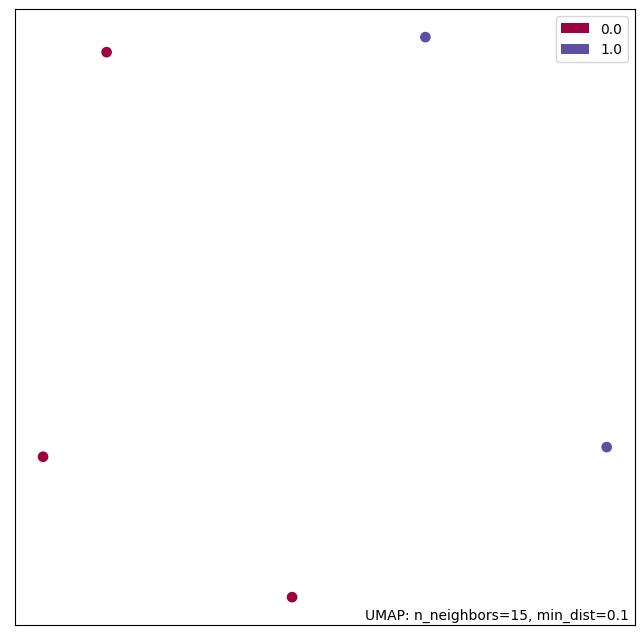

In [119]:
mapper = umap.UMAP().fit(X)
umap.plot.points(mapper, labels=y)

### xlm-roberta-base

In [ ]:
model = SentenceTransformer('xlm-roberta-base')

In [122]:
X_roberta = model.encode(df['space_text'].values)

In [123]:
X_roberta

array([[-0.00711084,  0.0268171 ,  0.00974334, ...,  0.06852724,
         0.04701304,  0.01082946],
       [-0.03403951,  0.01702253,  0.01818894, ...,  0.05046676,
         0.07676949, -0.01866864],
       [ 0.00829273,  0.00955358,  0.01509067, ...,  0.06690429,
         0.06152515,  0.04564012],
       [ 0.00394498,  0.00256888,  0.02720282, ...,  0.01354317,
         0.07913771,  0.06914054],
       [-0.02416928,  0.02446379,  0.02689366, ...,  0.07013968,
         0.0668876 ,  0.03093427]], dtype=float32)

/home/patcharapon/miniconda3/envs/sbert/lib/python3.8/site-packages/umap/umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


<AxesSubplot: >

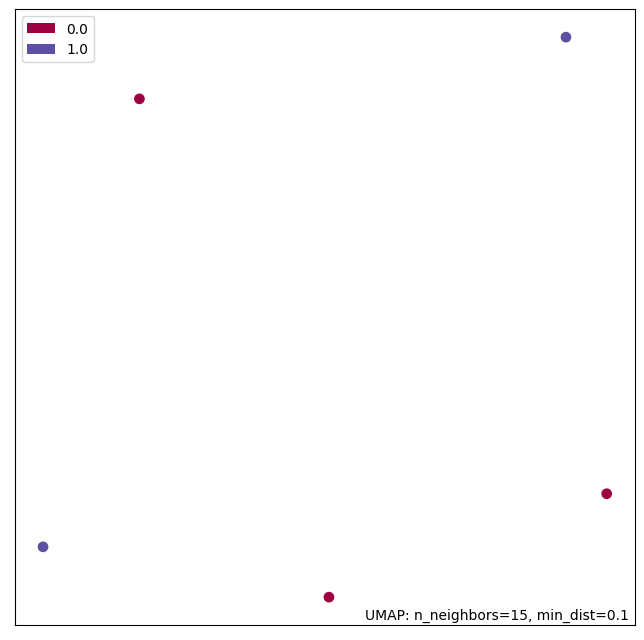

In [124]:
mapper = umap.UMAP().fit(X_roberta)
umap.plot.points(mapper, labels=y)

In [162]:
df_label = df[['TSIC Code', 'target']]
df_label = df_label.rename(columns={'TSIC Code': 'item', 'target': 'label' })
df_label

,item,label
0,32111,0
1,32111,0
2,32111,0
3,32112,1
4,32112,1


In [164]:
p = umap.plot.interactive(mapper, labels=y, hover_data=df, point_size=10)
umap.plot.show(p)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [ ]:
df['space_text']

In [127]:
hover_data = pd.DataFrame({'index':np.arange(30000),
                           'label':np.arange(30000)})
hover_data['item'] = hover_data.label.map(
    {
        '0':'T-shirt/top',
        '1':'Trouser',
        '2':'Pullover',
        '3':'Dress',
        '4':'Coat',
        '5':'Sandal',
        '6':'Shirt',
        '7':'Sneaker',
        '8':'Bag',
        '9':'Ankle Boot',
    }
)

NameError: name 'fmnist' is not defined

In [ ]:
hover_data

In [105]:
# X.shape

In [65]:
# pip install umap-learn[plot]

In [69]:
digits.data.shape

(1797, 64)

In [74]:
digits.target.shape

(1797,)

In [75]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [76]:
# digits

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

<AxesSubplot: >

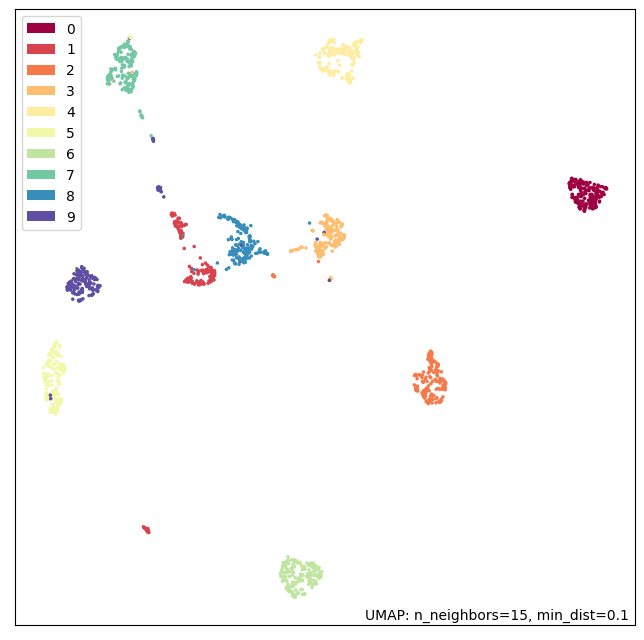

In [66]:
import umap
import umap.plot
from sklearn.datasets import load_digits

digits = load_digits()

mapper = umap.UMAP().fit(digits.data)
umap.plot.points(mapper, labels=digits.target)

In [61]:
# ! pip install umap-learn

In [62]:
# from sklearn.feature_extraction.text import TfidfTransformer
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.pipeline import Pipeline

# vocabulary = ['this', 'document', 'first', 'is', 'second', 'the',
#               'and', 'one']
# pipe = Pipeline([('count', CountVectorizer(vocabulary=vocabulary)),
#                  ('tfid', TfidfTransformer())]).fit(corpus)
# pipe['count'].transform(corpus).toarray()




# pipe['tfid'].idf_


# pipe.transform(corpus).shape